## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
#find out consistancy of data 
# mouse_data.dtypes
# mouse_data.count()

## Summary statistics

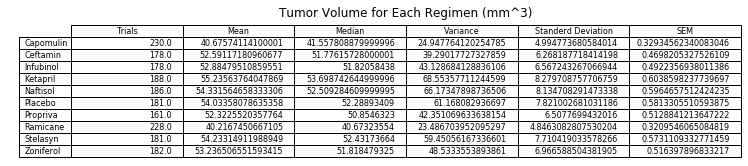

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Groupby Drug Regimen 
summary_stats_table = mouse_data.groupby("Drug Regimen").count()
# summarystats
# Figure out the mean of Tumor Volumne 
summary_stats_table["Mean"] = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# Figure out the median of Tumor Volumne
summary_stats_table["Median"] = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# Figure out the variance of Tumor Volumne
summary_stats_table["Variance"] = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# Figure out the standerd deviation of Tumor Volumne
summary_stats_table["Standerd Deviation"] = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# Figure out the sem of Tumor Volumne
summary_stats_table["SEM"] = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Combine into table 
summary_stats_table

#Add number of Trials for each drug Regimin 
summary_stats_table = summary_stats_table.rename(columns = {"Mouse ID" : "Trials"})

#Only Show mean, median, variance, standard deviation, and SEM
summary_stats_table = summary_stats_table[["Trials", "Mean", "Median", "Variance", "Standerd Deviation", "SEM"]]

summary_stats_table

#Display the Title to improve readablitity
fig = plt.figure(figsize = (12, 2.5))
ax = fig.add_subplot(111)

ax.table(cellText = summary_stats_table.values,
          rowLabels = summary_stats_table.index,
          colLabels = summary_stats_table.columns,
          loc = "center"
         )
ax.set_title("Tumor Volume for Each Regimen (mm^3)")

ax.axis("off");

## Bar plots

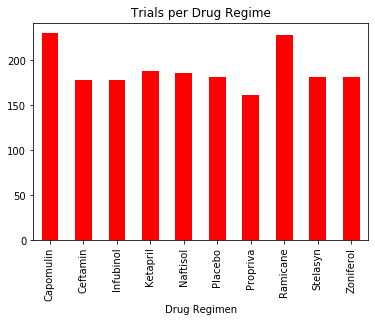

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
datapoints = summary_stats_table[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", color = "r", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

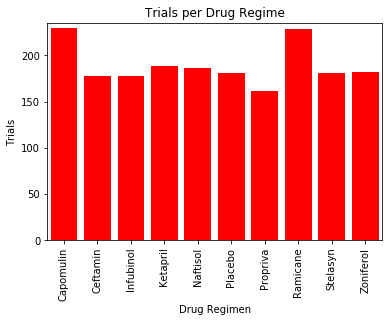

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Filter the DataFrame down only to those columns to chart
datapoints = summary_stats_table[["Trials"]]
# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, datapoints["Trials"], color = "r",)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(datapoints["Trials"])+5)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regimen")
plt.ylabel("Trials")

# Save our graph and show the grap
plt.show()

## Pie plots

([<matplotlib.patches.Wedge at 0x2c37bf2c908>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

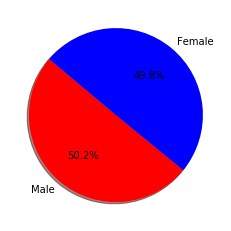

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Firgue out male and female 
sex_table = mouse_data[["Mouse ID", "Sex", "Drug Regimen"]]

#Only Keep unique Males and Females 
sex_table_plot = sex_table.drop_duplicates(subset="Mouse ID", keep='first')
sex_table_plot['Sex'].value_counts()

#Define Color and Labels
colors = ["red", "blue"]
labels = ["Male", "Female"]
#Make Pie Chart
plt.pie(sex_table_plot['Sex'].value_counts(), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x2c37bf74dc8>,
 [Text(-1.020421331486106, 0.4107801191003808, 'Ramicane'),
  Text(-1.0663103908041658, -0.270152087652617, 'Capomulin'),
  Text(-0.7017365050924529, -0.8470926026241936, 'Infubinol'),
  Text(-0.06703786490102187, -1.0979553381943696, 'Placebo'),
  Text(0.5934661690041763, -0.9261737991584013, 'Ceftamin'),
  Text(1.0255227699613736, -0.39787315603185897, 'Stelasyn'),
  Text(1.0628171140901612, 0.2835838182919844, 'Zoniferol'),
  Text(0.6909932066857414, 0.8558787229007135, 'Ketapril'),
  Text(0.05318004412842393, 1.098713740201013, 'Propriva'),
  Text(-0.5934662557188228, 0.9261737435940846, 'Naftisol')],
 [Text(-0.5565934535378758, 0.22406188314566225, '10.0%'),
  Text(-0.5816238495295449, -0.1473556841741547, '10.0%'),
  Text(-0.38276536641406517, -0.46205051052228735, '10.0%'),
  Text(-0.03656610812783011, -0.5988847299242015, '10.0%'),
  Text(0.32370881945682334, -0.5051857086318552, '10.0%'),
  Text(0.5593760563425673, -0.217021721471

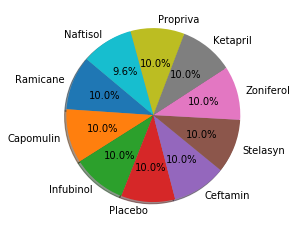

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# using the earlier unduplicated table find out Drug Regimin 
# sex_table_plot['Drug Regimen'].unique()
# sex_table_plot['Drug Regimen'].value_counts()
#Make Pie Chart
plt.pie(sex_table_plot['Drug Regimen'].value_counts(), labels=sex_table_plot['Drug Regimen'].unique(),
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Find the 4 most promising drug regiments
# toppromising = summary_stats_table.sort_values(by='Mean', ascending=True)
# toppromising.head(4)

#Isolate the 4 most promising drugs 
promise_1 = mouse_data.loc[(mouse_data["Drug Regimen"] == "Ramicane")]
promise_2 = mouse_data.loc[(mouse_data["Drug Regimen"] == "Capomulin")]
promise_3 = mouse_data.loc[(mouse_data["Drug Regimen"] == "Infubinol")]
promise_4 = mouse_data.loc[(mouse_data["Drug Regimen"] == "Ceftamin")]

# Sort by Timpepoints based on the latest values
min_promise_1 = promise_1.sort_values("Timepoint", ascending = False)
min_promise_2 = promise_2.sort_values("Timepoint", ascending = False)
min_promise_3 = promise_3.sort_values("Timepoint", ascending = False)
min_promise_4 = promise_4.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
final_promise_1 = min_promise_1.drop_duplicates(subset="Mouse ID", keep='first')
final_promise_2 = min_promise_2.drop_duplicates(subset="Mouse ID", keep='first')
final_promise_3 = min_promise_3.drop_duplicates(subset="Mouse ID", keep='first')
final_promise_4 = min_promise_4.drop_duplicates(subset="Mouse ID", keep='first')

# Combine the dataframes
data = [final_promise_1, final_promise_2, final_promise_3, final_promise_4]
data_all = pd.concat(data, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

# Determine quartiles
quartiles = data_all['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers from all data points
outliers_df = data_all.loc[(data_all['Tumor Volume (mm3)'] > upper_bound) | (data_all['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [14]:
#Print out Summary 
print(f'The lower quartile of Tumor Volumne is: {lowerq}')
print(f'The upper quartile of Tumor Volumne is: {upperq}')
print(f'The interquartile range of Tumor Volumne is: {iqr}')
print(f'The median of Tumor Volumne is: {medq}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values below {upper_bound} could be outliers')

The lower quartile of Tumor Volumne is: 37.187743802499995
The upper quartile of Tumor Volumne is: 59.930261755000004
The interquartile range of Tumor Volumne is: 22.74251795250001
The median of Tumor Volumne is: 45.0
Values below 3.0739668737499812 could be outliers
Values below 94.04403868375002 could be outliers


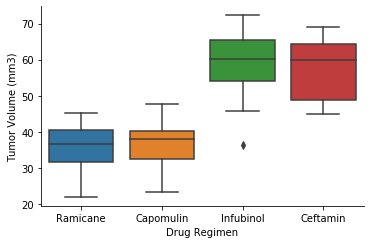

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import seaborn as sns
g = sns.catplot(x="Drug Regimen", y="Tumor Volume (mm3)", 
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=data_all);

## Line and scatter plots

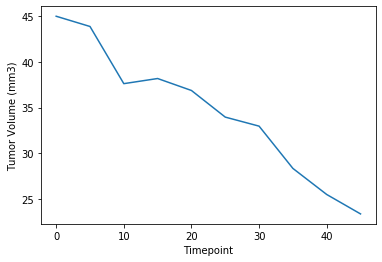

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Isolate a single rat from the group 
promise_2 = mouse_data.loc[(mouse_data["Drug Regimen"] == "Capomulin")]
filtered_promise_2 = promise_2.loc[(promise_2["Mouse ID"] == "s185")]
filtered_promise_2
s185_tumor_volume = sns.lineplot(x="Timepoint", y="Tumor Volume (mm3)", data=filtered_promise_2)
s185_tumor_volume

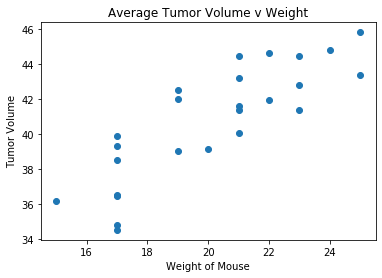

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#seaborn does not write out linear regression or correlation, use other method to plot scatter plot\
# Find the mean of both values
mouse_weight = promise_2.groupby(promise_2["Mouse ID"])["Weight (g)"].mean()
tumor_volume = promise_2.groupby(promise_2["Mouse ID"])["Tumor Volume (mm3)"].mean()
# Prints the scatter plot to the screen
plt.scatter(mouse_weight,tumor_volume)
plt.title("Average Tumor Volume v Weight")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Find the mean of both values
mouse_weight = promise_2.groupby(promise_2["Mouse ID"])["Weight (g)"].mean()
tumor_volume = promise_2.groupby(promise_2["Mouse ID"])["Tumor Volume (mm3)"].mean()
# Find the correlation 
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


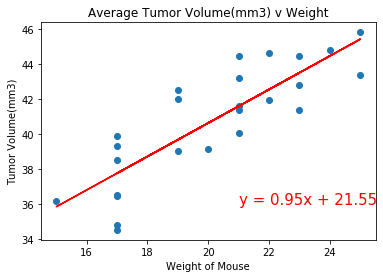

In [21]:
#Find linear regression 
from scipy.stats import linregress
# Find the mean of both values
mouse_weight = promise_2.groupby(promise_2["Mouse ID"])["Weight (g)"].mean()
tumor_volume = promise_2.groupby(promise_2["Mouse ID"])["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Average Tumor Volume(mm3) v Weight") 
plt.show()
